# <center> CFRM521 Machine Learning in Finance
## <center> Lecture 4
### <center> Yoshihiro Shirai

# Concepts in Classification

- These lecture notes are partially based on "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition, by Aurelien Geron (O'Reilly), 2022."

- Chapter 3: Performance measures for classification, multiclass classification.

# 0. Overview of the lecture
- Recall that there are two main types of supervised learning tasks: regression (predicting numerical values) and classification (predicting classes or categories). In the previous lectures, we considered how to train machine learning models, and then introduced two simple models: linear regression for regression problems and logistic regression for classification problems.

- Our main goal is to measure the performance in classification problems.

- We start with introducing a benchmark example of classification, namely, the MNIST dataset (recognizing handwritten digits).

- Our main goal is to measure the performance of a given classifier. We will discuss different approaches for evaluating a classifier.

- Most of the concepts are presented in the context of binary classification (i.e. two classes) and we explore how any binary classifier can be extended to a multiclass classifier using OvR and OvO.

# 1. Classification

- Goal: Classify an observation into specific classes or categories, based on a set of features.

- Examples: spam filter, classifying news as good or bad, classifying market movements as up or down based on news, classifying financial transactions as fraudant or not.

## 1.1. MNIST dataset

- The [MNIST (Modified National Institute of Standards and Technology)](http://yann.lecun.com/exdb/mnist/) dataset is a set of 70,000 images of handwritten digits

- It is a benchmark for classification algorithms to a point that is often called the "Hello World" of Machine Learning

- We will use this database to illustrate classification techniques

- Let us get the MNIST data using Scikit-Learn

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False, cache=True)

- Data sets loaded by Scikit-Learn have a similar structure

- They are "dictionaries", a Python data type which is a set of named items that can be of different types

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- The input variables are in the data key, which is an array with one row per example and one column per attribute

In [3]:
mnist['data']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

- The labels (the output variables) are in the target key (one label per example)

In [4]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

- Let us take a closer look at the dataset

In [5]:
X, y = mnist.data, mnist.target
print(type(X))
X.shape

<class 'numpy.ndarray'>


(70000, 784)

In [6]:
print(type(X[0,0]))
np.unique(X)

<class 'numpy.int64'>


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

- There are 70000 examples (that is, images), each example has $784 = 28 \times 28$  attributes, each attribute is an integer between 0 to 255. So the images are stored as a grid of pixels in this format.

- The labels are integers between 0 to 9 (that is, the digit that the image is representing)

In [7]:
y.shape

(70000,)

In [8]:
type(y[0])

str

- Let us take a look at the first data point

In [9]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

- This representation is good for a computer, not for us humans!

- We can find a good representation by using Matplotlib's `imshow()` function

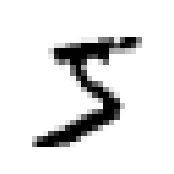

In [10]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    plt.figure(figsize=(4, 2))
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)

In [11]:
y[0]

'5'

- Before examining the dataset any further, we should create our test sets and put it aside

- For MNIST, we don't need to go into too much trouble. The dataset is already split into a training set (the first 60000 images) and a test set (the last 10000 images)

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
y_train[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [14]:
y_train[-10:]

array(['9', '2', '9', '5', '1', '8', '3', '5', '6', '8'], dtype=object)

- Usually the data should be shuffled (use `np.random.permutation` to obtain shuffled indicies) before using cross-validation. But this step is not strictly necessary here since the MNIST data is already shuffled.

# 1.2. Training a binary classifier

- Let us simplify the task to only detecting one digit, say 5

- So, we want to identify if a picture represents 5 or not

- A classification task with only two categories is called binary classification

- We need to change the labels to represent two categories, For example, we label instances of 5 by TRUE, and other digits by FALSE

In [15]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

- There are many different classification techniques. Here, we use the stochastic gradient descent (SGD) classifier

In [16]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

- Now, we can use the trained classifier to detect an image using the `predict()`

In [18]:
some_digit = X_train[36000]
sgd_clf.predict([some_digit])

array([False])

- It seems that the classifier is right

In [19]:
y_train[36000]

'9'

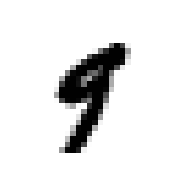

In [20]:
plot_digit(some_digit)

# 2. Performance measures for classification

- How good is the binary classifier we have just trained?

- Suppose we simply use the model on the whole training set and find out the number of images that it detects correctly

- Does this show the model is highly accurate?

In [21]:
y_pred = sgd_clf.predict(X_train)
n_correct = sum(y_pred==y_train_5)  # FALSE is 0, TRUE is 1
accuracy = 100*n_correct / len(y_pred)
print("{} correct predictions out of {} ({:.2f}%)"
      .format(n_correct,len(y_pred),accuracy))

57136 correct predictions out of 60000 (95.23%)


- No, the performance of the classifier is expected to be good on the set that is used for its training

- Such predictors are not "clean" in the sense that the prediction is made by a model that has already "seen" the true label

- How can we be sure that we are not over-fitting? Will the classifier perform well on images that it hasn't seen?

- Recall that we also cannot use the test set until the final model is selected.

- Next we consider various performance measures to be calculated using cross-validation, starting with accuracy.


## 2.1. Accuracy
- In this example, we use 3 fold CV to estimate the out-of-sample accuracy. This is implemented using `cross_val_score()` with the argument `scoring="accuracy"`.

In [22]:
from sklearn.model_selection import cross_val_score
cv_accuracy = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(cv_accuracy)
np.mean(cv_accuracy)

[0.95035 0.96035 0.9604 ]


0.9570333333333334

- Is this is a good classifier?

- It is not necessarily a good classifier. To see why, let us measure the performance of a dummy classifier that predicts every image as the most common class, which is "Not 5"

- This can be done using the DummyClassifier class.

In [23]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()

- Now let us do a 3-fold cross-validation

In [24]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

- Not too much worse than our previous classifier, actually!

- Why?

- Since about 10% of the images are 5, the "Not 5" classifier is correct about 90% of the time!

- Accuracy (that is, the proportion of correct predictions) is generally not a good performance measure, especially when working with skewed datasets, that is, when some categories are more frequent than others

- Accuracy may be a good performance measure for balanced datasets.
We need more sophisticated and better performance measures for classification

# 2.2. Confusion matrix

- A confusion matrix provides a systematic way for measuring the performance of a classifier

- Assume that you have a classification task with M labels (for binary classifier, $M=2$)

- Use a classifier to make predictions on a data set $\{(x_1,y_1),...,(x_N,y_N)\}$

- Let $\mathbf{y}=(y_1,...,y_N)$ be the actual labels and $\hat{\mathbf{y}}=(\hat{y}_1,...,\hat{y}_N)$ be the predictions

- The confusion matrix (of the classifier on the data set) is an $M\times M$ matrix $C=[C_{i,j}]$ whose $C_{i,j}$ element is the number of times that the predictor classifies a true $i$-th category example as a $j$-th category example 
$$C_{i,j}=\sum_{n=1}^N\mathbf{1}_{y_n=i,\hat{y}_n=j}$$

- However, there is not a scoring argument in the `cross_val_score()` function for the confusion matrix.

- Taking a step back, the first thing we need, is a set of predictions from the $K$-fold cross validation.

- Obtaining K-fold cross-validation predictions is easy with Scikit-Learn, simply use the `cross_val_predict()` function, which is similar to the `cross_val_score()` function but returns predictions instead of performance scores


In [25]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

- Since these predictions are from CV, they are clean in the sense that for the $i$-th fold, the model is trained on all but the $i$-th fold, and then the model is used to predict on the $i$-th fold.

- With a set of predictions (stored in `y_train_pred`) and real labels (stored in `y_train_5`), we can calculate the confusion matrix for our binary classifier. Simply use Scikit-Learn's function `confusion_matrix` (Can you think of how to write your own version of this function?)

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

- There are 53892 **"true negatives"** ("not 5" images **correctly** classified as "not 5")

- There are 687 **"false positives"** ("not 5" images **incorrectly** classified as "5")

- There are 1891 **"false negatives"** ("5" images **incorrectly** classified as "not 5")

- There are 3530 **"true positives"** ("5" images **correctly** classified as "5")

## 2.3. Precision-and-Recall

- The confusion matrix provides a complete picture of the performance of a classifier

- For a binary classification task, the confusion matrix is usually summarized by two metrics called precision and recall

- What percentage of positives are true?

- What is the probability that an instance that is predicted as "5" is actually a 5?

- What is an estimate of $\mathbb{P}(\text{true positive}|\text{predicted positive})$? This is the precision.

- The precision is defined as $$\text{precision}:= \frac{\text{true positive}}{\text{true positive} + \text{false positive}}$$

- What percentage of actual positives are identified as positive?

- What is the probability that an actual 5 is predicted as "5"?

- What is an estimate of $\mathbb{P}(\text{true positive}|\text{actual positive})$? This is the recall.

- The recall is defined as $$\text{recall}:= \frac{\text{true positive}}{\text{true positive}+\text{false negative}}$$

- Also known as **sensitivity** or **true positive rate (TPR)**

-The precision and recall can be summarized into a single number, the $F_1$ score , which is defined as harmonic average of precision and recall: $$F_1:=\frac{1}{\frac{1}{2}\left(\frac{1}{\text{precision}}+\frac{1}{\text{recall}}\right)}$$

- Although precision and recall may at first seem (confusingly) similar, they are not

- The following examples help

    1. Classification task: detecting fraudulent transactions

        - Precision: the probability that a flagged transaction is actually fraudulent (low precision = most flagged transactions are not fraud)

        - Recall: the probability that a fraudulent transaction is detected (low recall = many fraudulent transactions are not detected)

        - If a classifier has low precision but high recall, then the classifier will catch most fraudulent transactions but may also give many false positives.

        - Here, low precision but high recall is preferable if the cost of missing a fraudulent transaction is high, and the cost of false positives is low due to the flag only raising further checks.

    2. Classification task: Detecting text generated by ChatGPT or an AI langauge model.

        - Precision: the probability that a text that is flagged as generated by ChatGPT is actually generated by ChatGPT. (low precision = most text detected as generated by ChatGPT is not generated by ChatGPT)

        - Recall: the probability that a text generated by ChatGPT is detected. (low recall = many texts written by ChatGPT are not detected)

        - If a plagiarism detector for text generated by ChatGPT has high precision but low recall, then many texts generated by ChatGPT will not be flagged, but those that are flagged are very likely to be generated by ChatGPT

        - Here, high precision but low recall is generally preferable if it is undesirable to flag many texts as generated by ChatGPT without strong evidence.

You can use Scikit-Learn to find precision and recall and the $F_1$ score, as follows

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [28]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [29]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

- Only about 65.1% of the images that are classified as "5" are actually 5. Furthermore, only about 73.3% of images of "5" are detected.

- The SGD classifier doesn't look that good anymore!

# 2.4. Precision/Recall trade-off

- For classification tasks, increasing precision decreases recall and vice versa, this is known as the precision/recall trade-off

- To see why this is true, we need to understand how a binary classifier operates

    - They assign a score to each example (e.g. image) according to a "decision function" (training the classifier is essentially choosing a decision function based on the training set).

    - If the score is above a "decision threshold", the example is classified as "positive", otherwise it is classified as negative.

- By increasing the threshold, recall decreases or stays constant

- By increasing the threshold, the precision generally increases (it may temporarily decrease actually, but it will generally have an upward trend)

- Let us illustrate the precision/recall trade-off using our binary classifier

- First, note that the decision function (that is, the score) may not always be correct

- For example, a poorly written "6" may get a higher score than a poorly written 5 (the poorly written "6" may look more like a "5" than the poorly written "5")

- To demostrate this trade-off, we take a sample from the training set, get their predictions under the binary classifier and then pick 3 each for true negatives, false negatives, true positives, and false positives.

In [30]:
X_sample, y_sample, y_sample_5 = X_train[:1000], y_train[:1000], y_train_5[:1000]
y_sample_pred = sgd_clf.predict(X_sample) # are not out-of-sample predictions
TP_idx = np.argwhere(y_sample_5 & y_sample_pred) # Indexes corresponding to true positives
FP_idx = np.argwhere(np.logical_not(y_sample_5) & y_sample_pred) # False positives
FN_idx = np.argwhere(y_sample_5 & np.logical_not(y_sample_pred)) # False negatives
TN_idx = np.argwhere(np.logical_not(y_sample_5) & np.logical_not(y_sample_pred)) # True negatives

N = 3
idx = np.r_[(TN_idx[:N],FN_idx[:N],FP_idx[:N],TP_idx[:N])].flatten() # Choosing N of each

- To get the score for each prediction, we can call the `decision_function()` method for the classifier

In [31]:
y_sample_scores = sgd_clf.decision_function(X_sample)
y_sample_scores[idx]

array([ -5897.37359354, -13489.14805779,  -4623.84515943,  -2606.03524256,
        -2521.53206395,  -3108.39285377,    556.33231635,    401.07674454,
          170.76921855,   2164.22030239,   4742.52813158,   3930.41315967])

- A helper function to plot the digits

In [32]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap="binary", **options)
    plt.axis("off")

- Let us sort the instances according to their score and then take a look

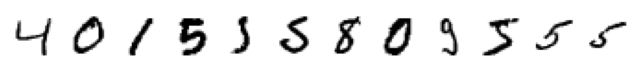

['4' '0' '1' '5' '5' '5' '8' '0' '9' '5' '5' '5']
[-13489.14805779  -5897.37359354  -4623.84515943  -3108.39285377
  -2606.03524256  -2521.53206395    170.76921855    401.07674454
    556.33231635   2164.22030239   3930.41315967   4742.52813158]


In [33]:
idx_sorted = idx[np.argsort(y_sample_scores[idx])]
plt.figure(figsize=(8, 1))
example_images = X_sample[idx_sorted]
plot_digits(example_images, images_per_row=12)
plt.show()
print(y_sample[idx_sorted])
print(y_sample_scores[idx_sorted])

- The decision threshold is 0.

- Can you guess what is the value of the decision threshold? What are the values of precision and recall? What happens if we increase or decrease the threshold?

- We can find precision and recall as a function of decision threshold using Scikit-Learn's `precision_recall_curve()` function

In [34]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds =  precision_recall_curve(
    y_sample_5[idx_sorted], y_sample_scores[idx_sorted])

- A helper function to plot the precision/recall curve

In [35]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="lower left", fontsize=16)
    plt.ylim([0, 1])

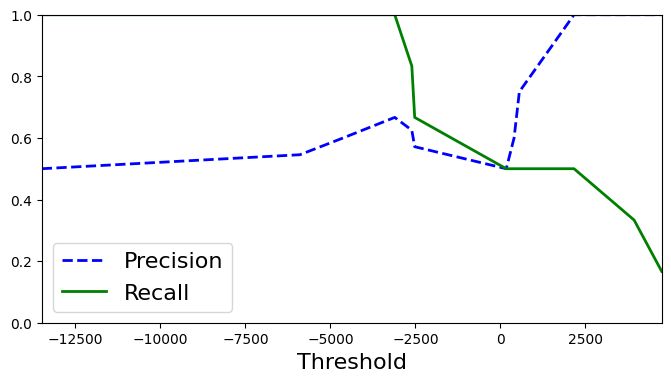

In [36]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([thresholds.min(), thresholds.max()])
plt.show()

- Recall is a nonincreasing function of the decision threshold. Increasing the decision threshold can only decrease (or not affect) recall

- Assume that the best value of the decision function corresponds to a true positive (i.e. a true 5). Then, as you increase the decision threshold, precision will eventually become 1. Precision may decrease before its eventual increase.

- Assume that a (terrible) classifier has the highest value of the decision function assigned to a false positive (a non-5). In this case, as you increase the decision threshold, precision may not eventually become 1.

- Note that the above is only to demonstrate the precision/recall trade-off as the decision boundary is varied in a small example. In practice, you should not follow this example, instead you should use out-of-sample predictions and all of the training set.

- Next, let us find the precision/recall curve for our training set using prediction with K-fold cross-validation

- To obtain the value of the decision function for predictions, use the cross_val_predict() function and pass the method="decision_function" argument to obtain the decision scores

In [37]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

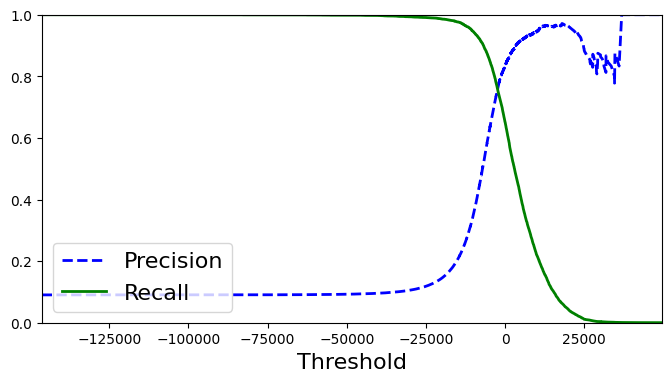

In [38]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([thresholds.min(), thresholds.max()])
plt.show()

- This picture shows you both metrics and can help you decide on a decision threshold

- Alternatively, we may plot precision against recall

In [39]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

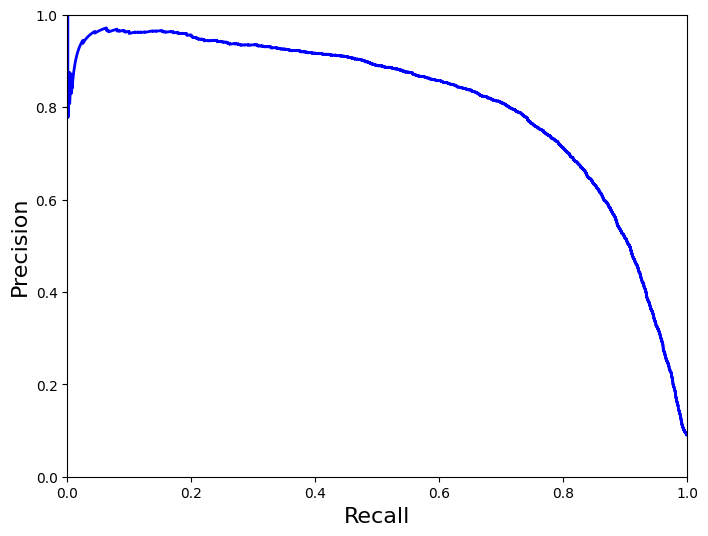

In [40]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

- Moving to higher thresholds is moving from right to left on the curve.

- Precision starts to fall sharply for recall values of about 80% or more, so, we might choose a recall value of about 80%

- The choice of the decision threshold depends on the nature of your project, sometimes recall is more important and other times precision is more important (see above examples).

- Suppose that you decide to aim for 90% precision. From the precision/recall curve, we find that the corresponding decision threshold is 3370

In [41]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439594

- We can make new predictions using the decision scores, as follows, and get the precision and recall

In [42]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [43]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

# 2.5. ROC curve

- The Receiver Operating Characteristic (ROC) curve provides an alternative way of deciding on the threshold

- It is a plot of true positive rate (another name for recall) against false positive rate (FPR)
$$\text{FPR}:=\frac{\text{false positives}}{\text{false positives}+\text{true negatives}}$$

- The FPR tells you percentage of actual negatives are identified as positive.

- There are other alternative terminology $$\text{specificity} := 1 − \text{FPR} = \frac{\text{true negatives}}{\text{false positives}+\text{true negatives}}$$ and sensitivity = recall. So, ROC is sensitivity against 1-specificity

- You can get the ROC curve using the `roc_curve()` function

In [44]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [45]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

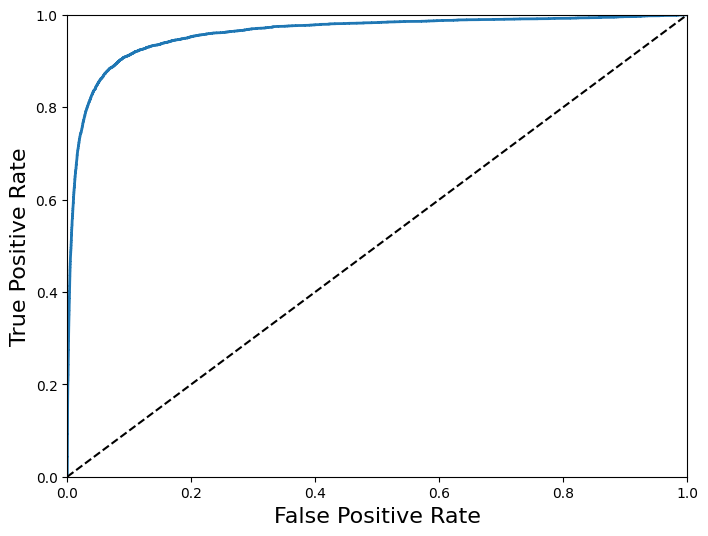

In [46]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

- The dotted line is the ROC of a purely random classifier. It has TPR=FPR.

- The higher the ROC curve, the better

- A good way to compare different classifiers is to compare the area under the curve (AUC) of their ROC curve, which is called the **"ROC AUC"** metric and is obtained by Scikit-Learn's `roc_auc_score()` function

In [47]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

- Let us train a different classifier and compare it with the SGD classifier using ROC AUC

- This time, we train a "random forest" classifier, which is implemented using the `RandomForestClassifier` class in Scikit-Learn

In [48]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

- This classifier does not use a decision function. Instead, it assigns a vector of probabilities to each instance, representing the probability that the instance belongs to each category

- As such, a RandomForestClassifier has a `predict_proba()` method instead of a `decision_function()`

- Let us calculate these "decision probabilities" using K-fold cross-validation

In [49]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

To calculate the ROC curve, we need a score and not a vector of scores. We can use the probability that the image is a "5" as the score

In [50]:
y_scores_forest = y_probas_forest[:, 1] # score = probability of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,
                                                      y_scores_forest)

- Let us compare the ROC curves of the SGD and random forest classifiers

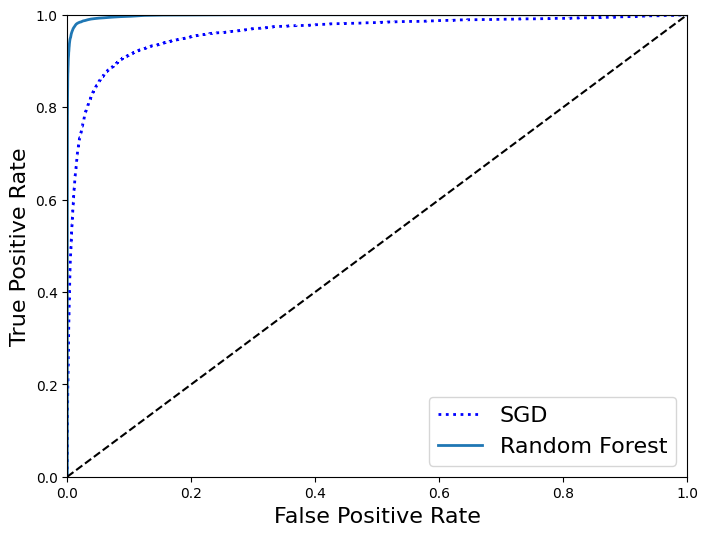

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

- The random forest classifier looks much better

- This is confirmed by the ROC AUC, precision, and recall metrics

In [52]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [53]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [54]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

Compare this to the SGD classifier which had 0.96 ROC AUC, 65.1% precision, and 73.3% recall.

# 3. Multiclass Classification

- Multiclass (or multinomial) classifiers distinguish between more than two classes

- Some classification algorithms such as random forest or naive Bayes classifiers are inherently multiclass. The same algorithm can handle both binary and multiclass classification tasks

- Others, such as linear or support vector machine classifiers, are strictly binary classifiers. To use them for multiclass classification, we should break down the task into binary classification subproblems

- There are two main strategies to break down a multiclass classification as a set of binary classifications

- **One-versus-rest (OvR)** strategy: For detecting M classes, we train M binary classifiers. The m-th classifier detects if an instance is of the m-th class or not. To classify an instance, the class with the highest decision function score is assigned. This is also called one-versus-all (OvA).

- **One-versus-one (OvO)** strategy: For detecting M classes, we train $\frac{M\times (M-1)}{2}$ binary classifiers. Each classifier detects if an instance is in class  $i$ or in class $j$, $i\neq j$. To classify an instance, you run all the classifiers and assign the class that *"wins most duels"*.

- Example: detecting digits $0,1,...,9$ (10 classes)

    - OvR: Train 10 binary classifiers that, respectively, detect if a digit is 0 or not, 1 or not, 2 or not, etc.

    - OvO: Train 45 binary classifiers that detect if a digit is 0 or 1, is 0 or 2, is 0 or 3, etc.

- There are more binary classifiers in the OvO strategy, but each binary classifier is easier to train than a binary classifier using the OvR strategy. Why?

- Because a "0 or 3" classifier, for example, only needs to be trained on data that is a 0 or a 3, instead of on the full training data
- Some algorithms, such as support vector machine classifiers, are adversely affected by the size of the training set. For them, it is better to train many binary classifiers each on a small test data set, rather than fewer classifiers on larger data sets. Thus, an OvO strategy is better for these algorithms

- If an algorithm scales well with the size of the training set, an OvR strategy is preferred

- Let us train a multiclass SGD classifier to detect digits $0,1,...,9$ in the MNIST dataset

In [55]:
sgd_clf.fit(X_train, y_train)  # y_train instead of y_train_5!

SGDClassifier(random_state=42)

- Next, we use the classifier to detect a digit

In [56]:
some_digit = X_train[36000]
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

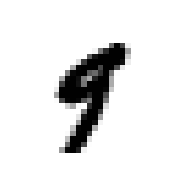

In [57]:
some_digit = X_train[36000]
plot_digit(some_digit)

- Scikit-Learn automatically detects that we are performing a multiclass classification (since there are more than 2 classes in `y_train`). It uses OvR for SGD classifier. Let us check this

In [58]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-42309.24702339, -24514.78707295, -21802.99686514,
          -253.56670849,  -6692.29918582,  -5022.40064344,
        -34623.10033652,  -8392.84727568,  -3181.89959952,
         -2356.71582334]])

In [59]:
np.argmax(some_digit_scores)

3

In [60]:
sgd_clf.classes_  # use the .classes_ attribute to get the list of classes

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [61]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
forest_clf.predict([some_digit])

array(['9'], dtype=object)

- Do you think that Scikit-learn used OvR or OvO?

- Neither, actually. Random forest is an inherently multiclass classifier capable of directly detecting more than two classes

In [63]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.01, 0.  , 0.01, 0.15, 0.  , 0.  , 0.04, 0.  , 0.79]])

- Let us evaluate the accuracy of these classifiers. We should use K-fold cross-validation.

In [64]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [65]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9646 , 0.96255, 0.9666 ])

- A purely random classifier would get a 10% accuracy. So, these scores are good indeed!

- It turns out that the accuracy is improved by applying a standard scaler to the features.

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

- We can make a more rigorous evaluation of the classifiers using the confusion matrix, which is obtained as before

In [67]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

- These are too many numbers. A visual representation of the confusion matrix is easier to interpret

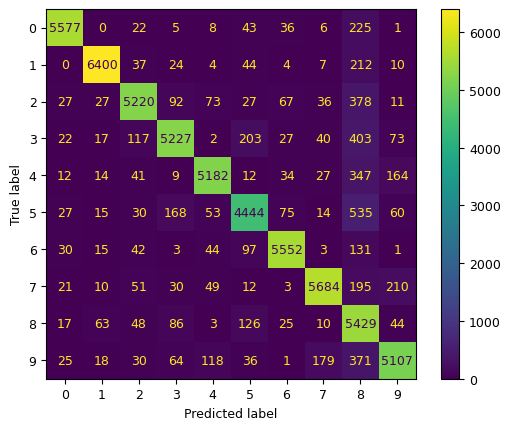

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

- We can see that most images are detected correctly (they are on the diagonal matrix)

- The diagonal element for 5 is slightly darker than other diagonal elements. That is, fewer 5's are correctly detected compared to other digits

- This may mean that the classifier performs worse for detecting fives, or it maybe that there are less 5 images in the dataset. In fact, it is both.

- Next, let us analyze what kinds of errors the SGD classifier makes

- For this, we normalize the matrix entries by the total number of images in each class, and eliminate the diagonal elements

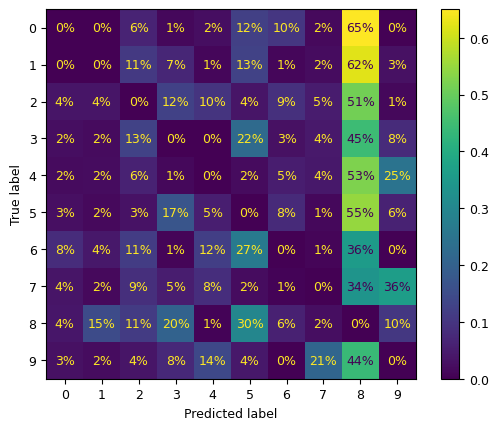

In [69]:
sample_weight = (y_train_pred != y_train)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

- Note that errors are not symmetric.

- The most common error are number classified as 8.

- Besides this other notable errors include 7s classified as 9s (36% of errors with 7s fall into this case) and 8s classfied as 5s.

- To improve our classifiers, we may focus on resolving these issues.

- To make Scikit-Learn use OvO and OvR, pass the classifier to the `OneVsOneClassifier` or `OneVsRestClassifier` function from `sklearn.multiclass`. For example to make SGDClassifier use OvO, use `ovo_clf = OneVsOneClassifier(SGDClassifier())`.